In [4]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 11*

### A integral de Laplace

Seja $f(t)$ uma função definida no intervalo $0\leq t \leq \infty$, com $t$ e $f(t)$ reais, então a função $F(s)$, definida pela integral de Laplace

$$\large
\begin{equation}
F(s)=\mathcal{L}\{f(t)\}=\int_{0}^{\infty} f(t) e^{-s t} dt,\;\; s \in \mathbb{C},
\end{equation}
$$

é conhecida como a transformada de Laplace de $f(t)$.

#### A exponencial complexa

Temos que $s = \sigma + j\omega$, logo

$$ 
e^{-s t} = e^{-(\sigma + j\omega) t} = e^{-\sigma t}e^{-j\omega t} = e^{-\sigma t} [\cos(\omega t) + j\sin(\omega t)]
$$

$$ 
\begin{align}
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} f(t) e^{-\sigma t} [\cos(\omega t) + j\sin(\omega t)] dt\\
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} f(t) e^{-\sigma t} \cos(\omega t) dt + j\int_{0}^{\infty} f(t) e^{-\sigma t}\sin(\omega t) dt\\
\mathcal{L}\{f(t)\}&=\int_{0}^{\infty} \left[\frac{f(t)}{e^{\sigma t}}\right] \cos(\omega t) dt + j\int_{0}^{\infty} \left[\frac{f(t)}{e^{\sigma t}}\right]\sin(\omega t) dt
\end{align}
$$

**Teorema da existência:** se $f(t)$ é uma função contínua por pedaços para $t$ no intervalo $[a,\infty)$ e é exponencial de ordem $\sigma_0$, então a integral de Laplace converge para $\Re{(s)}>a$.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

In [6]:
sp.init_printing()

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

# Função para plot de funções do sympy
def symplot(t, F, intervalo, funLabel):
     
    if type(F) == list:
        indLabel = 0
        for f in F:
            f_num = np.zeros(intervalo.shape)
 
            for indT in range(0,intervalo.size):
                f_num[indT] = f.evalf(subs={t:intervalo[indT]})
            
            plt.plot(intervalo, f_num, label=funLabel[indLabel])
            plt.legend();
            plt.xlim([min(intervalo), max(intervalo)]);
            plt.xlabel('tempo [s]');
            indLabel += 1
    else:
        f_num = np.zeros(intervalo.shape)
 
        for indT in range(0,intervalo.size):
            f_num[indT] = F.evalf(subs={t:intervalo[indT]})
            
        plt.plot(intervalo, f_num, label=funLabel)
        plt.legend();
        plt.xlim([min(intervalo), max(intervalo)]);
        plt.xlabel('tempo [s]');            
    
    plt.grid();

#### Definindo algumas variáveis simbólicas de interesse

In [7]:
t, s  = sp.symbols('t, s')
a     = sp.symbols('a', real=True, positive=True)
omega = sp.symbols('omega', real=True)

## Transformada de Laplace no Sympy

In [8]:
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.inverse_laplace_transform(F, s, t, noconds=True)

## Função degrau unitário

#### Domínio do tempo

In [9]:
u = sp.Heaviside(t) # função degrau unitário
u

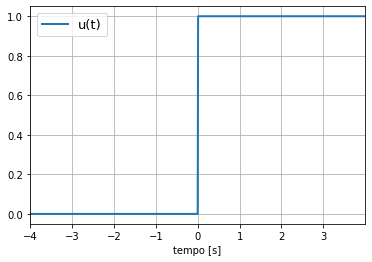

In [10]:
# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, u, intervalo, 'u(t)')

#### Domínio de Laplace

In [11]:
# calcula a transformada de Laplace de u(t)
U = L(u,t,s)
U

In [12]:
u = sp.Heaviside(t-2) # função degrau unitário em t=2
u

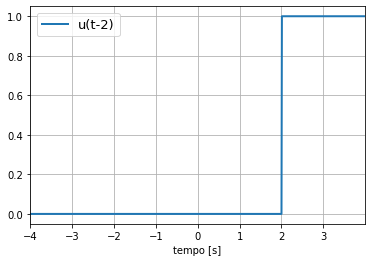

In [13]:
# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, u, intervalo, 'u(t-2)')

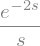

In [14]:
U = L(u,t,s)
U

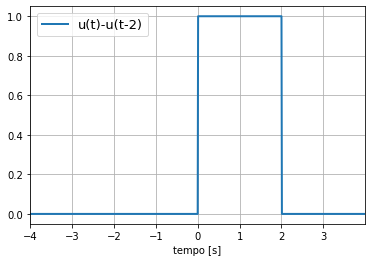

In [15]:
u1 = sp.Heaviside(t)   # função degrau unitário em t=0
u2 = sp.Heaviside(t-2) # função degrau unitário em t=2

# plota função no domínio do tempo
intervalo = np.arange(-4, 4, 0.01)
symplot(t, u1-u2, intervalo, 'u(t)-u(t-2)')

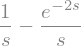

In [16]:
U = L(u1-u2,t,s)
U

## Função impulso unitário

#### Domínio do tempo

In [17]:
d = sp.DiracDelta(t)
d

#### Domínio de Laplace

In [18]:
# calcula a transformada de Laplace de δ(t)
D = L(d,t,s)
D

## Função exponecial

#### Domínio do tempo

In [19]:
f = sp.exp(-a*t)
f

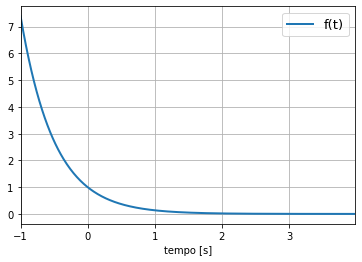

In [20]:
# plota função no domínio do tempo
intervalo = np.arange(-1, 4, 0.01)
symplot(t, f.subs({a:2}), intervalo, 'f(t)')

#### Domínio de Laplace

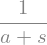

In [21]:
# calcula a transformada de Laplace de f(t)
F = L(f,t,s)
F

## Função cosseno amortecido

#### Domínio do tempo

In [22]:
g = sp.exp(-a*t)*sp.cos(omega*t)
g

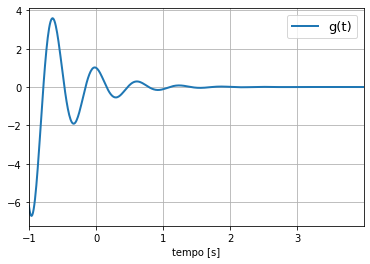

In [23]:
# plota função no domínio do tempo
intervalo = np.arange(-1, 4, 0.01)
symplot(t, g.subs({a:2, omega:10}), intervalo, 'g(t)')

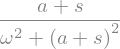

In [24]:
G = L(g,t,s)
G

## Resposta subamortecida de um circuito de segunda ordem

#### Domínio do tempo

In [25]:
B1, B2 = sp.symbols('B1, B2', real=True)

h = sp.exp(-a*t)*(B1*sp.cos(omega*t) + B2*sp.sin(omega*t))
h

#### Domínio de Laplace

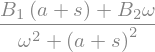

In [26]:
H = L(h,t,s)
H

In [ ]:
h1 = invL(H,s,t)
h1

## Gere sua tabela de transformadas

In [ ]:
func = [1,
         t,
         sp.exp(-a*t),
         t*sp.exp(-a*t),
         t**2*sp.exp(-a*t),
         sp.sin(omega*t),
         sp.cos(omega*t),
         1 - sp.exp(-a*t),
         sp.exp(-a*t)*sp.sin(omega*t),
         sp.exp(-a*t)*sp.cos(omega*t),
         ]
func

In [ ]:
Fs = [L(f,t,s) for f in func]
Fs